In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r"C:\Users\s\Research\Schizophrenia\SchiData1\train"
valid_path = r"C:\Users\s\Research\Schizophrenia\SchiData1\validation"

In [6]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob(r"C:\Users\s\Research\Schizophrenia\SchiData1\train\*")
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"C:\Users\s\Research\Schizophrenia\SchiData1\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r"C:\Users\s\Research\Schizophrenia\SchiData1\validation",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 369 images belonging to 2 classes.
Found 95 images belonging to 2 classes.


In [8]:
'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-8-af38dc06d319>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
12/12 [==============================] - 130s 11s/step - loss: 0.5383 - accuracy: 0.7751 - val_loss: 1.3961 - val_accuracy: 0.5368
Epoch 2/5
12/12 [==============================] - 125s 11s/step - loss: 0.0712 - accuracy: 0.9648 - val_loss: 0.4117 - val_accuracy: 0.7895
Epoch 3/5
12/12 [==============================] - 123s 10s/step - loss: 0.0369 - accuracy: 0.9837 - val_loss: 0.2473 - val_accuracy: 0.9053
Epoch 4/5
12/12 [==============================] - 126s 11s/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.2509 - val_accuracy: 0.9053
Epoch 5/5
12/12 [==============================] - 126s 11s/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.1584 - val_accuracy: 0.9368


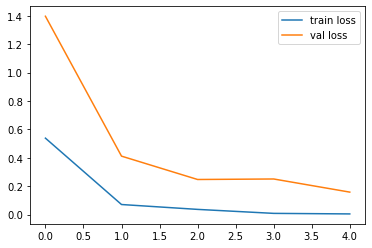

<Figure size 432x288 with 0 Axes>

In [9]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

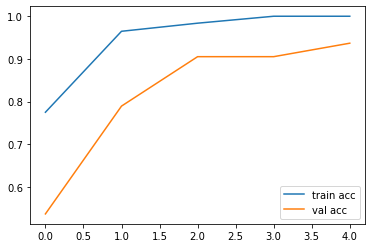

<Figure size 432x288 with 0 Axes>

In [12]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
import tensorflow as tf

from keras.models import load_model

model.save('VGG-16_model.h5')


Normal


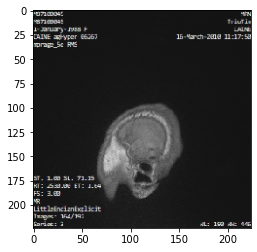

In [15]:
from keras.preprocessing import image
img = image.load_img(r"C:\Users\s\Research\Schizophrenia\SchiData1\validation\normal\normal_series_-img-00003-00164.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model(r"C:\Users\s\Research\Schizophrenia\model\VGG-16_model.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Normal")
else:
    print('Schizophrenia')